# MNIST Original Hand-written Images

In [4]:
import pandas as pd 
import joblib
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
df_train = pd.read_csv('../static/data/digits_train.csv')
df_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,6.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,4.0,16.0,16.0,15.0,16.0,16.0,2
1,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,2.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,3.0,12.0,12.0,14.0,15.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,15.0,16.0,14.0,3.0,0.0,0.0,5
4,0.0,0.0,6.0,11.0,16.0,16.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,5.0,16.0,13.0,0.0,0.0,0.0,5


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1347 non-null   float64
 1   pixel_0_1  1347 non-null   float64
 2   pixel_0_2  1347 non-null   float64
 3   pixel_0_3  1347 non-null   float64
 4   pixel_0_4  1347 non-null   float64
 5   pixel_0_5  1347 non-null   float64
 6   pixel_0_6  1347 non-null   float64
 7   pixel_0_7  1347 non-null   float64
 8   pixel_1_0  1347 non-null   float64
 9   pixel_1_1  1347 non-null   float64
 10  pixel_1_2  1347 non-null   float64
 11  pixel_1_3  1347 non-null   float64
 12  pixel_1_4  1347 non-null   float64
 13  pixel_1_5  1347 non-null   float64
 14  pixel_1_6  1347 non-null   float64
 15  pixel_1_7  1347 non-null   float64
 16  pixel_2_0  1347 non-null   float64
 17  pixel_2_1  1347 non-null   float64
 18  pixel_2_2  1347 non-null   float64
 19  pixel_2_3  1347 non-null   float64
 20  pixel_2_

In [8]:
import sklearn.datasets as sd
digits = sd.load_digits()

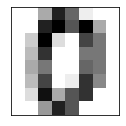

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]); plt.yticks([])
plt.show()

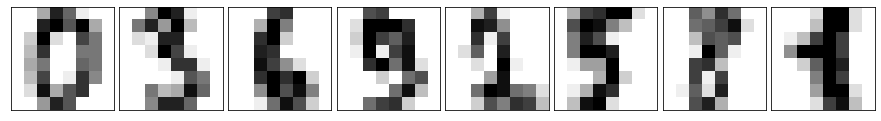

In [10]:

fig = plt.figure(figsize=(12, 2))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i*3], cmap=plt.cm.binary, interpolation='nearest')

In [11]:
df_test = pd.read_csv('../static/data/digits_test.csv')
df_test.head(3)

,index,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,667,0.0,0.0,4.0,16.0,15.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,14.0,11.0,0.0,0.0,1
1,971,0.0,0.0,5.0,15.0,14.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4.0,11.0,13.0,16.0,11.0,0.0,9
2,914,0.0,0.0,7.0,14.0,9.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,5.0,15.0,16.0,16.0,12.0,1.0,9


In [12]:
img_index_list = df_test['index'].values
target_index_list = df_test['target'].values
len(img_index_list), len(target_index_list)

(450, 450)

In [13]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_train.shape, y_train.shape

((1347, 64), (1347,))

In [14]:
X_test = df_test.iloc[:, 1:-1].values  # 첫번째 컬럼이 index 이므로 이를 배제
y_test = df_test.target.values
X_test.shape, y_test.shape

((450, 64), (450,))

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1347, 64), (450, 64))

In [17]:
joblib.dump(scaler, '../static/model/digits_scaler.pkl')

['../static/model/digits_scaler.pkl']

### 1. Logistic Regression

In [18]:
lr_clf = LogisticRegression()
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
params = {
    'C': [2, 6, 7, 10, 20, 30, 100]
}

In [23]:
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9673
최적 파라미터: {'C': 2}


In [24]:
best_lr = grid_cv.best_estimator_
pred = best_lr.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9666666666666667

In [25]:
joblib.dump(best_lr, '../static/model/digits_lr.pkl')

['../static/model/digits_lr.pkl']

### SVM

In [26]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
params = {
    'C': [2, 6, 7, 10, 20, 30, 100]
}

In [28]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9933
최적 파라미터: {'C': 6}


In [29]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9844444444444445

In [30]:
joblib.dump(best_sv, '../static/model/digits_sv.pkl')

['../static/model/digits_sv.pkl']

### 3. Random Forest

In [31]:
rf_clf = RandomForestClassifier()
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
params = {
    'max_depth': [14, 16, 18, 20],
    'min_samples_split': [2, 3, 4]
}

In [34]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9740
최적 파라미터: {'max_depth': 16, 'min_samples_split': 4}


In [35]:
best_rf = grid_cv.best_estimator_
pred = best_rf.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9666666666666667

In [36]:
joblib.dump(best_rf, '../static/model/digits_rf.pkl')

['../static/model/digits_rf.pkl']